## Observations and Insights 

1. Capomulin and Ramicane were the most administered drug treatment.

2. Ramicane appears to be the most successful at reducing tumor volume.

3. The correlation between weight and average tumor volume with Capomulin is 0.84, indicating that when the mouse weight is higher so is the volume of their tumor.



In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

#Rename columns
mouse_study_df = mouse_study_df.rename(columns={"Mouse ID":"mouse_id","Drug Regimen":"drug_regimen","Weight (g)":"weight","Tumor Volume (mm3)":"tumor_volume","Metastatic Sites":"metastatic_sites"})

# Display the data table for preview
mouse_study_df.head()

,mouse_id,drug_regimen,Sex,Age_months,weight,Timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.00%,0
1,k403,Ramicane,Male,21,16,5,38.83%,0
2,k403,Ramicane,Male,21,16,10,35.01%,1
3,k403,Ramicane,Male,21,16,15,34.22%,1
4,k403,Ramicane,Male,21,16,20,33.00%,1


In [107]:
# Checking the number of mice.
len(mouse_study_df.mouse_id.unique())

249

In [108]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study_df.loc[mouse_study_df.duplicated(subset=["mouse_id", "Timepoint"]),"mouse_id"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [109]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = mouse_study_df.loc[mouse_study_df['mouse_id'] == "g989"]
g989_data

,mouse_id,drug_regimen,Sex,Age_months,weight,Timepoint,tumor_volume,metastatic_sites
908,g989,Propriva,Female,21,26,0,45.00%,0
909,g989,Propriva,Female,21,26,0,45.00%,0
910,g989,Propriva,Female,21,26,5,48.79%,0
911,g989,Propriva,Female,21,26,5,47.57%,0
912,g989,Propriva,Female,21,26,10,51.75%,0
913,g989,Propriva,Female,21,26,10,49.88%,0
914,g989,Propriva,Female,21,26,15,51.33%,1
915,g989,Propriva,Female,21,26,15,53.44%,0
916,g989,Propriva,Female,21,26,20,55.33%,1
917,g989,Propriva,Female,21,26,20,54.66%,1


In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study_df[mouse_study_df.mouse_id != "g989"]
mouse_study_cleaned

,mouse_id,drug_regimen,Sex,Age_months,weight,Timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.00%,0
1,k403,Ramicane,Male,21,16,5,38.83%,0
2,k403,Ramicane,Male,21,16,10,35.01%,1
3,k403,Ramicane,Male,21,16,15,34.22%,1
4,k403,Ramicane,Male,21,16,20,33.00%,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15%,2
1889,z969,Naftisol,Male,9,30,30,65.84%,3
1890,z969,Naftisol,Male,9,30,35,69.18%,4
1891,z969,Naftisol,Male,9,30,40,70.31%,4


In [111]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(mouse_study_cleaned.mouse_id.unique())
total_mice

248

## Summary Statistics

In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Calculate mean
drug_regimen_mean = mouse_study_cleaned.groupby('drug_regimen').mean()["tumor_volume"]
# Calculate median
drug_regimen_median = mouse_study_cleaned.groupby('drug_regimen').median()["tumor_volume"]
# Calculate variance
drug_regimen_variance = mouse_study_cleaned.groupby('drug_regimen').var()["tumor_volume"]
# Calculate standard deviation
drug_regimen_std = mouse_study_cleaned.groupby('drug_regimen').std()["tumor_volume"]
#Calculate SEM
drug_regimen_sem = mouse_study_cleaned.groupby('drug_regimen').sem()["tumor_volume"]

regimen_tumor_volume = pd.DataFrame({"Mean": drug_regimen_mean, "Median": drug_regimen_median, "Variance": drug_regimen_variance, "Standard Deviation": drug_regimen_std, "SEM":drug_regimen_sem})
regimen_tumor_volume

,Mean,Median,Variance,Standard Deviation,SEM
drug_regimen,,,,,
Capomulin,40.68%,41.56%,24.95%,4.99%,0.33%
Ceftamin,52.59%,51.78%,39.29%,6.27%,0.47%
Infubinol,52.88%,51.82%,43.13%,6.57%,0.49%
Ketapril,55.24%,53.70%,68.55%,8.28%,0.60%
Naftisol,54.33%,52.51%,66.17%,8.13%,0.60%
Placebo,54.03%,52.29%,61.17%,7.82%,0.58%
Propriva,52.32%,50.45%,43.85%,6.62%,0.54%
Ramicane,40.22%,40.67%,23.49%,4.85%,0.32%
Stelasyn,54.23%,52.43%,59.45%,7.71%,0.57%


## Bar and Pie Charts

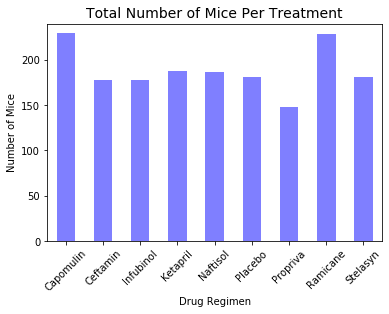

In [114]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_per_drug_regimen = mouse_study_cleaned.groupby(["drug_regimen"]).count()["mouse_id"].sort_index()

mice_per_drug_regimen.plot.bar(color='b', rot=45, alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice Per Treatment",fontsize = 14)
plt.xlim(-0.5, 8.5)
plt.ylim(0, 240)

plt.savefig("charts/Total_Mice_per_Drug_Regimen_Pandas.png", bbox_inches='tight')
plt.show()


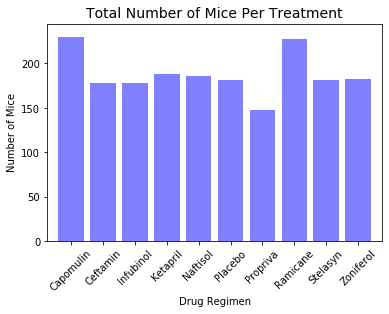

In [115]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_count = mouse_study_cleaned.groupby(["drug_regimen"]).count()["mouse_id"].tolist()
drug_regiment_list = np.arange(len(mice_per_drug_regimen))

tick_locations = [value for value in drug_regiment_list]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation=45)

plt.bar(drug_regiment_list, mice_count, color='b', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice Per Treatment",fontsize = 14)
plt.xlim(-0.75, len(drug_regiment_list)-0.25)
plt.ylim(0, max(mice_count)+15)

plt.savefig("charts/Total_Mice_per_Drug_Regimen_Pyplot.png", bbox_inches='tight')
plt.show()

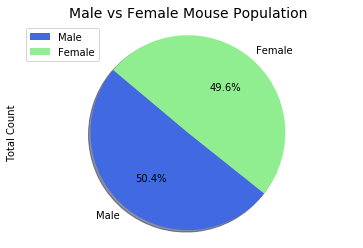

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#mice_gender_groups = mouse_study_cleaned.groupby(["Sex"]).count()
#mice_gender_groups

# Drop duplicates by mouse ID
mouse_study_cleaned_no_dupes = mouse_study_cleaned.drop_duplicates("mouse_id")

# Count number of each gender and set column name to Total Count
mice_gender_groups = mouse_study_cleaned_no_dupes["Sex"].value_counts().reset_index(name='Total Count')

# Calculate percentage by dividing gender counts and total players
mice_gender_groups["Percentage of Gender"] = (mice_gender_groups["Total Count"] / total_mice) * 100

# Rename index to Gender
mice_gender_groups = mice_gender_groups.rename(columns={"index":"Sex"}).set_index("Sex")
pd.options.display.float_format = '{:,.2f}%'.format

mice_gender_groups.plot.pie(y='Total Count', colors = ['royalblue', 'lightgreen'], startangle=140, shadow = True, autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population', fontsize = 14)
plt.axis("equal")

plt.savefig("charts/Mouse_Gender_Distribution_Pandas.png", bbox_inches = "tight")
plt.show()

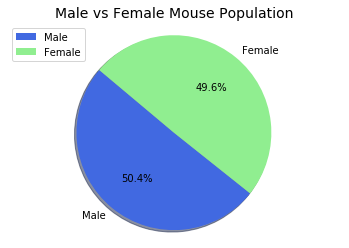

In [30]:
mice_gender_count = mice_gender_groups["Percentage of Gender"].tolist()
mice_gender_count

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender_count, colors = ['royalblue', 'lightgreen'], labels=['Male','Female'], startangle=140, shadow = True, autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population', fontsize = 14)
plt.axis("equal")
plt.legend(('Male', 'Female'))

plt.savefig("charts/Mouse_Gender_Distribution_Pyplot.png", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = mouse_study_df.loc[mouse_study_df["drug_regimen"] == "Capomulin",:]
Ramicane_df = mouse_study_df.loc[mouse_study_df["drug_regimen"] == "Ramicane", :]
Infubinol_df = mouse_study_df.loc[mouse_study_df["drug_regimen"] == "Infubinol", :]
Ceftamin_df = mouse_study_df.loc[mouse_study_df["drug_regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last_timepoint = Capomulin_df.groupby('mouse_id').max()['Timepoint']
Ramicane_last_timepoint = Ramicane_df.groupby('mouse_id').max()['Timepoint']
Infubinol_last_timepoint = Infubinol_df.groupby('mouse_id').max()['Timepoint']
Ceftamin_last_timepoint = Ceftamin_df.groupby('mouse_id').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merged = pd.merge(Capomulin_last_timepoint, mouse_study_df, on=("mouse_id","Timepoint"), how="left")
Ramicane_merged = pd.merge(Ramicane_last_timepoint, mouse_study_df, on=("mouse_id","Timepoint"), how="left")
Infubinol_merged = pd.merge(Infubinol_last_timepoint, mouse_study_df, on=("mouse_id","Timepoint"), how="left")
Ceftamin_merged = pd.merge(Ceftamin_last_timepoint, mouse_study_df, on=("mouse_id","Timepoint"), how="left")

In [50]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_tumor_volume = Capomulin_merged["tumor_volume"]

quartiles = Capomulin_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin_tumor_volume is: {lowerq}")
print(f"The upper quartile of Capomulin_tumor_volume is: {upperq}")
print(f"The interquartile range of Capomulin_tumor_volume is: {iqr}")
print(f"The the median of Capomulin_tumor_volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin_tumor_volume Values below {lower_bound} could be outliers.")
print(f"Capomulin_tumor_volume Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin_tumor_volume is: 32.37735684
The upper quartile of Capomulin_tumor_volume is: 40.1592203
The interquartile range of Capomulin_tumor_volume is: 7.781863460000004
The the median of Capomulin_tumor_volume is: 38.125164399999996 
Capomulin_tumor_volume Values below 20.70456164999999 could be outliers.
Capomulin_tumor_volume Values above 51.83201549 could be outliers.


In [52]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Ramicane_tumor_volume = Ramicane_merged["tumor_volume"]

quartiles = Ramicane_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane_tumor_volume is: {lowerq}")
print(f"The upper quartile of Ramicane_tumor_volume is: {upperq}")
print(f"The interquartile range of Ramicane_tumor_volume is: {iqr}")
print(f"The the median of Ramicane_tumor_volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane_tumor_volume Values below {lower_bound} could be outliers.")
print(f"Ramicane_tumor_volume Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane_tumor_volume is: 31.56046955
The upper quartile of Ramicane_tumor_volume is: 40.65900627
The interquartile range of Ramicane_tumor_volume is: 9.098536719999998
The the median of Ramicane_tumor_volume is: 36.56165229 
Ramicane_tumor_volume Values below 17.912664470000003 could be outliers.
Ramicane_tumor_volume Values above 54.30681135 could be outliers.


In [53]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Infubinol_tumor_volume = Infubinol_merged["tumor_volume"]

quartiles = Infubinol_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol_tumor_volume is: {lowerq}")
print(f"The upper quartile of Infubinol_tumor_volume is: {upperq}")
print(f"The interquartile range of Infubinol_tumor_volume is: {iqr}")
print(f"The the median of Infubinol_tumor_volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol_tumor_volume Values below {lower_bound} could be outliers.")
print(f"Infubinol_tumor_volume Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol_tumor_volume is: 54.04860769
The upper quartile of Infubinol_tumor_volume is: 65.52574285
The interquartile range of Infubinol_tumor_volume is: 11.477135160000003
The the median of Infubinol_tumor_volume is: 60.16518046 
Infubinol_tumor_volume Values below 36.83290494999999 could be outliers.
Infubinol_tumor_volume Values above 82.74144559000001 could be outliers.


In [55]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Ceftamin_tumor_volume = Ceftamin_merged["tumor_volume"]

quartiles = Ceftamin_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin_tumor_volume is: {lowerq}")
print(f"The upper quartile of Ceftamin_tumor_volume is: {upperq}")
print(f"The interquartile range of Ceftamin_tumor_volume is: {iqr}")
print(f"The the median of Ceftamin_tumor_volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin_tumor_volume Values below {lower_bound} could be outliers.")
print(f"Ceftamin_tumor_volume Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin_tumor_volume is: 48.72207785
The upper quartile of Ceftamin_tumor_volume is: 64.29983003
The interquartile range of Ceftamin_tumor_volume is: 15.577752179999997
The the median of Ceftamin_tumor_volume is: 59.85195552 
Ceftamin_tumor_volume Values below 25.355449580000002 could be outliers.
Ceftamin_tumor_volume Values above 87.66645829999999 could be outliers.


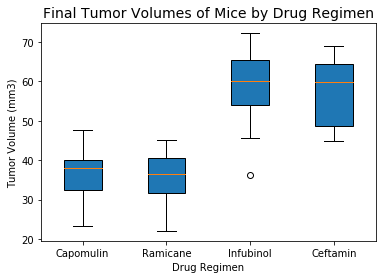

In [63]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_data = [Capomulin_tumor_volume, Ramicane_tumor_volume, Infubinol_tumor_volume, Ceftamin_tumor_volume]

plt.boxplot(box_plot_data,patch_artist=True,labels=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volumes of Mice by Drug Regimen",fontsize = 14)
plt.savefig("charts/Tumor_Volume_Box_Plot.png", bbox_inches = "tight")
plt.show()


## Line and Scatter Plots

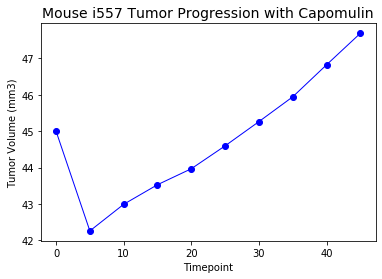

In [84]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_line_plot = Capomulin_df.loc[Capomulin_df["mouse_id"] == "i557",:]
#Capomulin_line_plot.head()

x_line_axis = Capomulin_line_plot["Timepoint"]
y_line_axis = Capomulin_line_plot["tumor_volume"]

plt.plot(x_line_axis, y_line_axis, linewidth=1, marker="o", color="blue")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse i557 Tumor Progression with Capomulin",fontsize = 14)
plt.savefig("charts/Mouse_Tumor_Progression.png", bbox_inches = "tight")
plt.show()

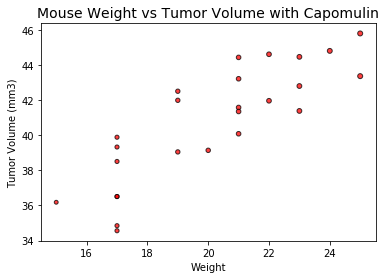

In [85]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_avg = Capomulin_df.groupby(['mouse_id']).mean()

x_scatter_axis = Capomulin_avg["weight"]
y_scatter_axis = Capomulin_avg['tumor_volume']

plt.scatter(x_scatter_axis, y_scatter_axis, marker="o", facecolors="red", edgecolors="black", s=x_scatter_axis, alpha=0.75)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume with Capomulin",fontsize = 14)
plt.savefig("charts/Mouse_Weight_vs_Tumor_Volume.png", bbox_inches = "tight")
plt.show()




## Correlation and Regression

The correlation between weight and average tumor volume with Capomulin is 0.84


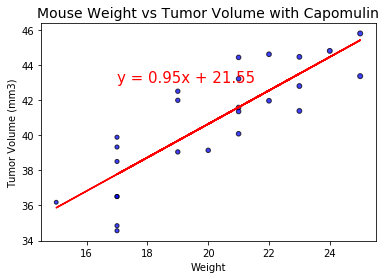

In [105]:
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient  

correlation = st.pearsonr(x_scatter_axis,y_scatter_axis)
print(f"The correlation between weight and average tumor volume with Capomulin is {round(correlation[0],2)}")

# Calculate the linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatter_axis, y_scatter_axis)
regress_values = x_scatter_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_scatter_axis, y_scatter_axis, marker="o", facecolors="blue", edgecolors="black", s=x_scatter_axis, alpha=0.75)
plt.plot(x_scatter_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(17, 43),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume with Capomulin",fontsize = 14)
plt.savefig("charts/Mouse_Weight_vs_Tumor_Volume.png", bbox_inches = "tight")
plt.show()